In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.cross_validation import train_test_split

%matplotlib inline

# Limit rows disp# Limit rows displayed in notebook
pd.set_option('display.max_rows', 20)
pd.set_option('display.precision', 2)

In [2]:
restaurants = pd.read_pickle('restaurant/restaurant_with_topic_dist.pkl')
restaurants.head()

,open,review_count,stars,cat.Active Life,cat.Adult Entertainment,cat.Afghan,cat.African,cat.Airports,cat.American (New),cat.American (Traditional),...,avg_topic_40,avg_topic_41,avg_topic_42,avg_topic_43,avg_topic_44,avg_topic_45,avg_topic_46,avg_topic_47,avg_topic_48,avg_topic_49
0,1,23,2.5,0,0,0,0,0,1,0,...,0,0.0,0,0,0,0,0.0,0,0.0,0.0
1,1,322,4.0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0.0,0,0.0,0.0
2,1,191,3.5,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0.1,0,0.1,0.0
3,1,170,3.5,0,0,0,0,0,0,1,...,0,0.0,0,0,0,0,0.0,0,0.0,0.0
4,1,204,4.0,0,0,0,0,0,0,0,...,0,0.1,0,0,0,0,0.0,0,0.1,0.1


In [3]:
y = restaurants.stars
X = restaurants.copy()
del X['stars']
X.head()

,open,review_count,cat.Active Life,cat.Adult Entertainment,cat.Afghan,cat.African,cat.Airports,cat.American (New),cat.American (Traditional),cat.Amusement Parks,...,avg_topic_40,avg_topic_41,avg_topic_42,avg_topic_43,avg_topic_44,avg_topic_45,avg_topic_46,avg_topic_47,avg_topic_48,avg_topic_49
0,1,23,0,0,0,0,0,1,0,0,...,0,0.0,0,0,0,0,0.0,0,0.0,0.0
1,1,322,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0.0,0,0.0,0.0
2,1,191,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0.1,0,0.1,0.0
3,1,170,0,0,0,0,0,0,1,0,...,0,0.0,0,0,0,0,0.0,0,0.0,0.0
4,1,204,0,0,0,0,0,0,0,0,...,0,0.1,0,0,0,0,0.0,0,0.1,0.1


# Linear regression

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

def get_rss(lin_model, X_test, y_test):
    predicted = lin_model.predict(X_test)
    print 'Residual sum of squares:'
    print np.mean((predicted - y_test) ** 2)
    return

def get_score(lin_model, X_test, y_test):
    print 'Score:'
    print lin_model.score(X_test, y_test)
    return

def get_cross_val_score(lin_model, X, y):
    scores = cross_val_score(lin_model, X, y, cv=5)
    print "5-fold cross validation scores:"
    print scores
    print
    print "Mean Score: %f" % scores.mean()
    return

def get_coef_matrix(lin_model, X):
    coef_= pd.DataFrame(zip(X.columns.values, lin_model.coef_), columns=['Features', 'Coefficient'])
    return coef_.sort(columns='Coefficient',ascending=False).head(10)

## OLS Regression

#### Run linear regression on the set of features from the business dataset (excluding attributes about reviews)

In [5]:
# features from just the business data set
X_1 = X.loc[:,:'wifi.paid']

X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.2, random_state=12)

reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [6]:
get_coef_matrix(reg, X_1)

,Features,Coefficient
108,cat.Food Stands,1.1
185,cat.Pool Halls,0.9
184,cat.Polish,0.9
25,cat.Bars,0.7
40,cat.Bubble Tea,0.7
146,cat.Jazz & Blues,0.7
13,cat.Argentine,0.7
148,cat.Karaoke,0.7
140,cat.Internet Cafes,0.7
198,cat.Salvadoran,0.7


In [7]:
get_rss(reg, X_test, y_test)

Residual sum of squares:
0.259596115461


In [8]:
get_score(reg, X_test, y_test)

Score:
0.192955610255


In [9]:
get_cross_val_score(reg, X_1, y)

5-fold cross validation scores:
[ 0.18809425  0.19408245  0.13636728  0.17114252  0.07577891]

Mean Score: 0.153093


#### Run linear regression without any category columns

In [10]:
X_no_cats = pd.concat([X.loc[:, :'review_count'], X.loc[:, 'Accepts Credit Cards_y':'wifi.paid']], axis=1)
X_no_cats.head()  

,open,review_count,Accepts Credit Cards_y,Ambience.casual_y,Ambience.classy_y,Ambience.divey_y,Ambience.hipster_y,Ambience.intimate_y,Ambience.romantic_y,Ambience.touristy_y,...,Noise.average,Noise.loud,Noise.quiet,Noise.very_loud,beer_and_wine,full_bar,no alcohol,wifi.free,wifi.no,wifi.paid
0,1,23,1,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,1,322,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,1,191,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,1,170,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,1,204,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_no_cats, y, test_size=0.2, random_state=12)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [12]:
get_coef_matrix(reg, X_no_cats)

,Features,Coefficient
7,Ambience.intimate_y,0.3
11,Ambience.upscale_y,0.3
6,Ambience.hipster_y,0.3
30,Good For.dessert_y,0.2
66,Noise.quiet,0.2
21,Dietary Restrictions.vegan_y,0.1
47,Parking.lot_y,0.1
26,Good For Groups_y,0.1
62,dressy,0.1
12,Caters_y,0.1


In [13]:
get_rss(reg, X_test, y_test)
print
get_score(reg, X_test, y_test)

Residual sum of squares:
0.273743746664

Score:
0.148972801151


In [14]:
get_cross_val_score(reg, X_no_cats, y)

5-fold cross validation scores:
[ 0.14762904  0.17152079  0.10346834  0.15180227  0.00640165]

Mean Score: 0.116164


#### Run linear regression with review attributes added (including topic features)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [55]:
get_coef_matrix(reg, X)

,Features,Coefficient
108,cat.Food Stands,0.8
140,cat.Internet Cafes,0.7
40,cat.Bubble Tea,0.7
85,cat.Do-It-Yourself Food,0.6
185,cat.Pool Halls,0.6
228,cat.Teppanyaki,0.6
146,cat.Jazz & Blues,0.6
13,cat.Argentine,0.5
184,cat.Polish,0.5
109,cat.Food Trucks,0.5


In [56]:
get_rss(reg, X_test, y_test)

Residual sum of squares:
0.215626457237


In [57]:
get_score(reg, X_test, y_test)

Score:
0.329650513898


In [58]:
get_cross_val_score(reg, X, y)

5-fold cross validation scores:
[ 0.36105961  0.30228333  0.25301486  0.33702765  0.25590468]

Mean Score: 0.301858


## Regularized Regression

In [20]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

ridge = Ridge(alpha=.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='auto', tol=0.001)

In [21]:
get_coef_matrix(ridge, X)

,Features,Coefficient
108,cat.Food Stands,0.8
184,cat.Polish,0.6
185,cat.Pool Halls,0.6
40,cat.Bubble Tea,0.6
228,cat.Teppanyaki,0.5
210,cat.Soul Food,0.5
140,cat.Internet Cafes,0.5
13,cat.Argentine,0.5
25,cat.Bars,0.5
148,cat.Karaoke,0.5


In [22]:
get_rss(ridge, X_test, y_test)

Residual sum of squares:
0.25655252379


In [23]:
get_score(ridge, X_test, y_test)

Score:
0.20241766857


In [24]:
get_cross_val_score(ridge, X, y)

5-fold cross validation scores:
[ 0.21637396  0.21809743  0.13145829  0.21939879  0.06923663]

Mean Score: 0.170913


## Evaluating Features

In [25]:
# observe category columns
cat_features = X.loc[:, 'cat.Active Life':'cat.Yoga']
df = pd.DataFrame(cat_features.sum(), columns=['total'])
df


,total
cat.Active Life,8
cat.Adult Entertainment,0
cat.Afghan,3
cat.African,2
cat.Airports,0
cat.American (New),328
cat.American (Traditional),449
cat.Amusement Parks,1
cat.Appliances,1
cat.Arabian,1


In [26]:
delete = df[df['total']==0]
for val in delete.index.values:
    del X[val]
cats = df[df['total']>0]
cats

,total
cat.Active Life,8
cat.Afghan,3
cat.African,2
cat.American (New),328
cat.American (Traditional),449
cat.Amusement Parks,1
cat.Appliances,1
cat.Arabian,1
cat.Arcades,3
cat.Argentine,1


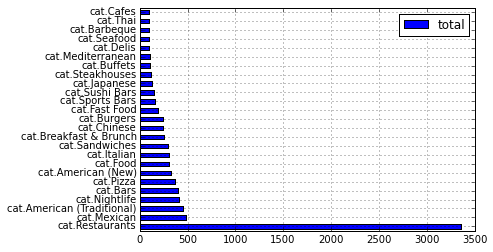

In [27]:
cats.sort(columns='total',ascending=False)[:25].plot(kind='barh')

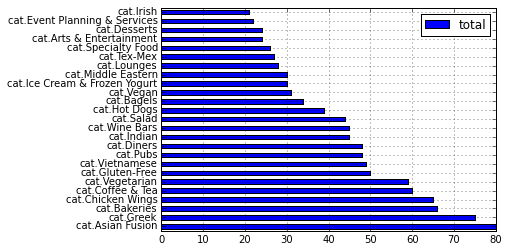

In [28]:
cats.sort(columns='total',ascending=False)[25:50].plot(kind='barh')

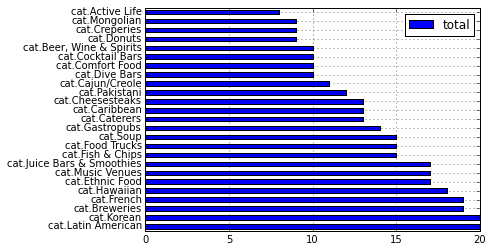

In [29]:
cats.sort(columns='total',ascending=False)[50:75].plot(kind='barh')

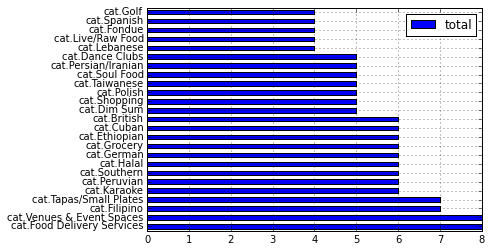

In [30]:
cats.sort(columns='total',ascending=False)[75:100].plot(kind='barh')

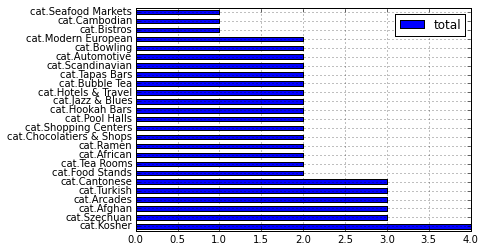

In [31]:
cats.sort(columns='total',ascending=False)[100:125].plot(kind='barh')

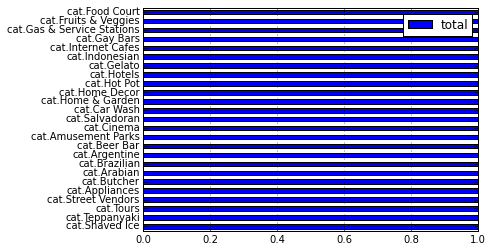

In [32]:
cats.sort(columns='total',ascending=False)[125:150].plot(kind='barh')

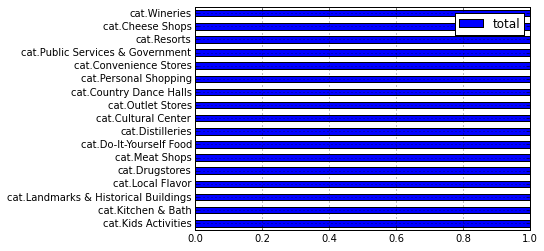

In [33]:
cats.sort(columns='total',ascending=False)[150:].plot(kind='barh')

In [34]:
print X.columns.values

[u'open' u'review_count' u'cat.Active Life' u'cat.Afghan' u'cat.African'
 u'cat.American (New)' u'cat.American (Traditional)' u'cat.Amusement Parks'
 u'cat.Appliances' u'cat.Arabian' u'cat.Arcades' u'cat.Argentine'
 u'cat.Arts & Entertainment' u'cat.Asian Fusion' u'cat.Automotive'
 u'cat.Bagels' u'cat.Bakeries' u'cat.Barbeque' u'cat.Bars' u'cat.Beer Bar'
 u'cat.Beer, Wine & Spirits' u'cat.Bistros' u'cat.Bowling' u'cat.Brazilian'
 u'cat.Breakfast & Brunch' u'cat.Breweries' u'cat.British'
 u'cat.Bubble Tea' u'cat.Buffets' u'cat.Burgers' u'cat.Butcher'
 u'cat.Cafes' u'cat.Cajun/Creole' u'cat.Cambodian' u'cat.Cantonese'
 u'cat.Car Wash' u'cat.Caribbean' u'cat.Caterers' u'cat.Cheese Shops'
 u'cat.Cheesesteaks' u'cat.Chicken Wings' u'cat.Chinese'
 u'cat.Chocolatiers & Shops' u'cat.Cinema' u'cat.Cocktail Bars'
 u'cat.Coffee & Tea' u'cat.Comfort Food' u'cat.Convenience Stores'
 u'cat.Country Dance Halls' u'cat.Creperies' u'cat.Cuban'
 u'cat.Cultural Center' u'cat.Dance Clubs' u'cat.Delis' u'ca

In [35]:
X_no_cats = pd.concat([X.loc[:, :'review_count'], X.loc[:, 'Accepts Credit Cards_y':'wifi.paid']], axis=1)
X_no_cats                       

,open,review_count,Accepts Credit Cards_y,Ambience.casual_y,Ambience.classy_y,Ambience.divey_y,Ambience.hipster_y,Ambience.intimate_y,Ambience.romantic_y,Ambience.touristy_y,...,Noise.average,Noise.loud,Noise.quiet,Noise.very_loud,beer_and_wine,full_bar,no alcohol,wifi.free,wifi.no,wifi.paid
0,1,23,1,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,1,322,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,1,191,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,1,170,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,1,204,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
5,1,73,1,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
6,1,152,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
7,0,77,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8,0,59,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
9,1,105,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [36]:
X_attr = X.loc[:, 'Accepts Credit Cards_y': 'wifi.paid']
df = pd.DataFrame(X_attr.sum(), columns=['total'])
df[df['total']==0]

,total
Payment Types.discover_y,0


In [37]:
del X['Payment Types.discover_y']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1101601d0>]], dtype=object)

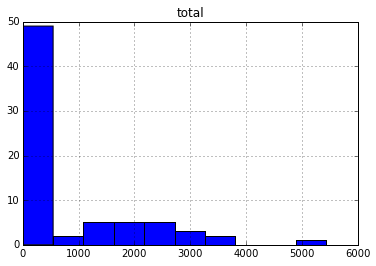

In [38]:
df.hist()

In [39]:
X_topics = pd.concat([X.loc[:, :'review_count'], X.loc[:, 'avg_review_length':'avg_topic_49']], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_topics, y, test_size=0.2, random_state=12)

ridge = Ridge(alpha=.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='auto', tol=0.001)

In [41]:
get_coef_matrix(ridge, X_topics)

,Features,Coefficient
29,avg_topic_23,0.4
52,avg_topic_46,0.4
47,avg_topic_41,0.4
20,avg_topic_14,0.3
24,avg_topic_18,0.3
9,avg_topic_3,0.3
33,avg_topic_27,0.3
28,avg_topic_22,0.3
55,avg_topic_49,0.3
19,avg_topic_13,0.3


In [42]:
get_rss(ridge, X_test, y_test)
print
get_score(ridge, X_test, y_test)

Residual sum of squares:
0.292043236148

Score:
0.0920825033254


In [44]:
get_cross_val_score(ridge, X_topics, y)

5-fold cross validation scores:
[ 0.09038425  0.05638416  0.05609245  0.07102842 -0.05630411]

Mean Score: 0.043517


In [45]:
reviews = pd.read_pickle('review/reviews_with_topics.pkl')
reviews

,business_id,review_id,date.year,date.month,date.day,stars,text,review_length,votes.cool,votes.funny,votes.useful,user_id,topic_id_50,topic_prob_50,word_dist_50
0,E7nk0lC317pGxMX56gvaVQ,onOLEBffcpWS_jcaBLCqdw,2008,6,17,1,This place is a huge waste of the space they m...,1239,3,4,2,eBFm-lABQiKpaUcPDfYOgA,39,0.6,"[(0.00977830773598, place), (0.00650128695031,..."
1,duHUQFn7K-Ybs1rPI4AOEQ,23z4mKkaMCXGFw4cm6xHxA,2012,4,15,3,I used to frequent Z-Tejas more frequently for...,936,1,1,2,y5_vrqIylhXMrejM_-x_vA,43,0.7,"[(0.0090865194881, good), (0.00526586990462, g..."
2,_K5cfCM7-zQZ1hXdbsc2fQ,dqrwXpcYdFvNYL5z1AeuZw,2013,12,1,3,"Meeting some friends for dinner, they live in ...",1119,0,0,0,8si1MT348c-rNZYDWCJvzQ,39,0.6,"[(0.00977830773598, place), (0.00650128695031,..."
3,OTq55xUFMOz13DAi9D0_rw,uiJbTytfC1zsSOQ4aA3AWg,2014,12,23,4,"Good food, and good service",27,0,0,1,YfWmj8wWbuiCbnC6D8gvpw,48,0.9,"[(0.0146616328294, good), (0.0142812265826, fo..."
4,Kfbs3K37ZczrOQnoxgzNkw,II7cxU1cbOxVqzYY4ueflQ,2012,1,25,4,Came here today to get lunch to go. They were ...,661,1,0,2,kffxYQVQsEpF1DVlQlcGCg,5,0.9,"[(0.0063096357766, food), (0.00550394162605, g..."
5,eO-o7FRjNEzcSEG8pakkzA,B_82U0OC0N8a4hxlZPVYaQ,2014,7,17,5,"I may be a tad biased, but in reality the beer...",412,0,0,0,Ucj7ZMTPlHn4m0fT4_P2GA,49,0.8,"[(0.00926695870943, good), (0.00639987900282, ..."
6,IcB2KDjGXdkG07Sitmik0A,fRBrsMowC6tedwrm5iwhhg,2013,11,14,4,Came for lunch. We work right down the street ...,358,0,0,0,KAllCv3C0FiqiSrUkAn2eA,33,0.7,"[(0.00408668446278, toast), (0.003505062079, b..."
7,Exx5ffvnmk4MrTyCkPRuug,Ti-LQhvgGjoqN_i_sac8Yg,2013,11,2,5,Great place for a large group! Made reservatio...,637,0,0,0,lEN84aUC9c6Fv5kDcu9zdw,28,0.5,"[(0.00552451427927, place), (0.00490164005368,..."
8,5_tsOGJQDDl9iKOr8K79Rw,g9LPuGXljBbFE213-qEQpA,2014,10,23,5,Awesome place! Amber was amazing! Gave suggest...,120,2,1,0,-0PLMxluG1ETKpl364Sj6g,38,0.9,"[(0.0133049281147, good), (0.0124872546346, pl..."
9,EBwv1DBGKsfdNZEYL70Dqw,Oa1gS7cQ58y3J9Y4Fv524A,2011,6,2,2,"Limited atmosphere, exceedingly slow, bland fo...",67,1,0,1,mH87P9BZplY3vdk0nYkXFA,44,0.9,"[(0.00342332455296, food), (0.002721709558, pl..."


In [53]:
restaurants = pd.read_pickle('restaurant/restaurant_with_topic_dist1.pkl')
y = restaurants.stars
X = restaurants.copy()
del X['stars']
del X['business_id']
del X['avg_business_id']
X.head()

,open,review_count,cat.Active Life,cat.Adult Entertainment,cat.Afghan,cat.African,cat.Airports,cat.American (New),cat.American (Traditional),cat.Amusement Parks,...,avg_topic_40,avg_topic_41,avg_topic_42,avg_topic_43,avg_topic_44,avg_topic_45,avg_topic_46,avg_topic_47,avg_topic_48,avg_topic_49
0,1,23,0,0,0,0,0,1,0,0,...,0,0.0,0,0,0,0,0.0,0,0.0,0.0
1,1,322,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0.0,0,0.0,0.0
2,1,191,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0.1,0,0.1,0.0
3,1,170,0,0,0,0,0,0,1,0,...,0,0.0,0,0,0,0,0.0,0,0.0,0.0
4,1,204,0,0,0,0,0,0,0,0,...,0,0.1,0,0,0,0,0.0,0,0.1,0.1


In [59]:
print X.columns.values

[u'open' u'review_count' u'cat.Active Life' u'cat.Adult Entertainment'
 u'cat.Afghan' u'cat.African' u'cat.Airports' u'cat.American (New)'
 u'cat.American (Traditional)' u'cat.Amusement Parks' u'cat.Appliances'
 u'cat.Arabian' u'cat.Arcades' u'cat.Argentine' u'cat.Art Galleries'
 u'cat.Arts & Crafts' u'cat.Arts & Entertainment' u'cat.Asian Fusion'
 u'cat.Australian' u'cat.Auto Repair' u'cat.Automotive' u'cat.Bagels'
 u'cat.Bakeries' u'cat.Bangladeshi' u'cat.Barbeque' u'cat.Bars'
 u'cat.Basque' u'cat.Beauty & Spas' u'cat.Bed & Breakfast' u'cat.Beer Bar'
 u'cat.Beer Gardens' u'cat.Beer, Wine & Spirits' u'cat.Belgian'
 u'cat.Bistros' u'cat.Bowling' u'cat.Brasseries' u'cat.Brazilian'
 u'cat.Breakfast & Brunch' u'cat.Breweries' u'cat.British'
 u'cat.Bubble Tea' u'cat.Buffets' u'cat.Burgers' u'cat.Burmese'
 u'cat.Butcher' u'cat.Cafes' u'cat.Cafeteria' u'cat.Cajun/Creole'
 u'cat.Cambodian' u'cat.Candy Stores' u'cat.Cantonese' u'cat.Car Wash'
 u'cat.Caribbean' u'cat.Casinos' u'cat.Caterers' u'

In [60]:
X['avg_topic_prob_50']

0    0.5
1    0.5
2    0.5
3    0.5
4    0.5
5    0.4
6    0.3
7    0.8
...
3350    0.8
3351    0.2
3352    0.4
3353    0.9
3354    0.6
3355    0.8
3356    0.5
3357    0.4
Name: avg_topic_prob_50, Length: 3358, dtype: float64